Number of images in the training set: 50000
Number of images in the validation set: 10000
Number of images in the test set: 10000

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              

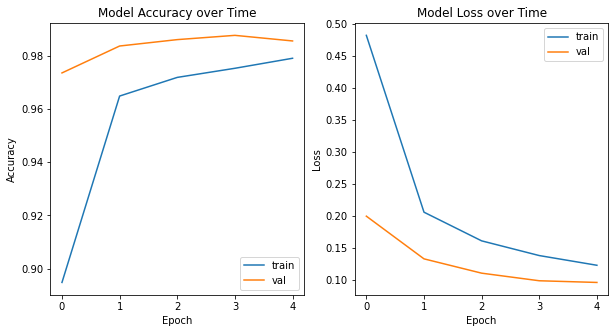

In [ ]:
# Danny Hong
# ECE 472 - Deep Learning
# Assignment 3

import gzip
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Flatten, Dense
from matplotlib import pyplot as plt

def get_x_data(x_data_file):
  x_data = gzip.open(x_data_file, 'rb')
  x_data.read(16)
  x_data = np.frombuffer(x_data.read(), dtype = np.uint8).astype(np.float32).reshape(-1, num_rows, num_columns, 1)
  x_data = x_data / 255

  return x_data

def get_y_data(y_data_file):
  y_data = gzip.open(y_data_file, 'rb')
  y_data.read(8)
  y_data = np.frombuffer(y_data.read(), dtype = np.uint8).astype(np.float32)
  y_data = to_categorical(y_data)

  return y_data

def plot_historical_data(history):
  fig, axs = plt.subplots(1, 2, figsize = (10, 5))

  #Plotting the model's historical accuracy data for the training and validation sets
  axs[0].plot(history.history['accuracy'])
  axs[0].plot(history.history['val_accuracy'])
  axs[0].set_title('Model Accuracy over Time')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(['train', 'val'])

  #Plotting the model's historical loss data for the training and validation sets
  axs[1].plot(history.history['loss'])
  axs[1].plot(history.history['val_loss'])
  axs[1].set_title('Model Loss over Time')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss')
  axs[1].legend(['train', 'val'])

num_rows = 28
num_columns = 28
num_classes = 10
weight_decay = 0.001

def main():

  #The MNIST dataset was downloaded from this link: https://deepai.org/dataset/mnist
  #Each of the files were then uploaded into the notebook directory and read in
  x_train, x_test = get_x_data(x_data_file = "train-images-idx3-ubyte.gz"), get_x_data(x_data_file = "t10k-images-idx3-ubyte.gz")
  y_train, y_test = get_y_data(y_data_file = "train-labels-idx1-ubyte.gz"), get_y_data(y_data_file = "t10k-labels-idx1-ubyte.gz")

  #Applying cross validation by splitting each of the training sets into a new training set and a validation set
  original_train_size = len(x_train)
  new_train_size = len(x_train) - len(x_test)
  x_val, y_val = x_train[new_train_size:original_train_size], y_train[new_train_size:original_train_size]
  x_train, y_train = x_train[0:new_train_size], y_train[0:new_train_size]

  print(f"Number of images in the training set: {x_train.shape[0]}")
  print(f"Number of images in the validation set: {x_val.shape[0]}")
  print(f"Number of images in the test set: {x_test.shape[0]}\n") 

  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = tf.nn.relu, input_shape = (num_rows, num_columns, 1)))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = tf.nn.relu))
  model.add(MaxPool2D(pool_size = (2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation = tf.nn.relu, kernel_regularizer = l2(weight_decay)))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = tf.nn.softmax))

  model.summary() 

  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  history = model.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_data = (x_val, y_val), verbose = 1)
  
  score = model.evaluate(x_test, y_test, verbose = 0)
  print('\nTest loss:', score[0])
  print('Test accuracy:', score[1])

  plot_historical_data(history)

main()  